In [8]:
# Name: Ansfred D'Souza
# Class: TY B Comp
# Roll Number: 322002
# PR Number: 22010961
# Assignment - 3: Decision Tree

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

df = pd.read_csv("sales.csv")

In [2]:
df

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [3]:
df.describe()

,Age,Income,Gender,MaritialStatus,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


In [4]:
df.Buys.value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [5]:
from decorator import DEF
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x = df.iloc[:, :-1]       # -1 means last column is not taken into consideration
x = x.apply(le.fit_transform)

print("Age with Encoded Values :", list(zip(df.iloc[:, 0], x.iloc[:, 0])))
print("\nIncome with Encoded Values :", list(zip(df.iloc[:, 1], x.iloc[:, 1]))) 
print("\nGender with Encoded Values :", list(zip(df.iloc[:, 2], x.iloc[:, 2]))) 
print("\nMaritial Status with Encoded Values :", list(zip(df.iloc[:, 3], x.iloc[:, 3])))

Age with Encoded Values : [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income with Encoded Values : [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Gender with Encoded Values : [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]

Maritial Status with Encoded Values : [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [6]:
x

,Age,Income,Gender,MaritialStatus
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [7]:
y = df.iloc[:, -1]

from sklearn.tree import DecisionTreeClassifier 
classifier=DecisionTreeClassifier(criterion='entropy') 
classifier.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [9]:
'''
To check the given value we have to give the encoded value. The encoded vales are :
<21: 1
Low: 1
Female : 0
Married : 0

Therefore x_test becomes [1 1 0 0]
'''

test_x = np.array([1,1,0,0]) 
pred_y = classifier.predict([test_x])
print("Predicted Class for Input [Age < 21, Income = Low, Gender = Female, Marital Status = Married]\n", test_x," is ", pred_y[0])

Predicted Class for Input [Age < 21, Income = Low, Gender = Female, Marital Status = Married]
 [1 1 0 0]  is  Yes


c:\Users\Ansari\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(100.44000000000001, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(66.96000000000001, 65.232, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(33.480000000000004, 21.744, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(100.44000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 65.232, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(234.36, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'entropy =

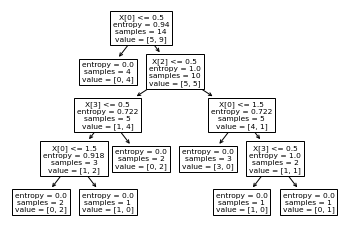

In [10]:
from sklearn import tree
tree.plot_tree(classifier)

In [11]:
from sklearn.tree import export_graphviz 
from IPython.display import Image
export_graphviz(classifier, out_file="data.dot", feature_names=x.columns,class_names=["No", "Yes"])